# Temporal network models

In this notebook we show how to perform some basic operations on temporal graphs, reproducing the main plots appearing in the notes. Besides the classical packages, we will deploy some functions that are contained in the `Tnet.py` file whose content of this file is provided in the next notebook. If you want to run this notebook, create a folder named `src`, and add a file named `Tnet.py` with the codes insde of it.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from collections import Counter
import matplotlib.pyplot as plt
import sys
from copy import copy

np.set_printoptions(legacy='1.25')

sys.path.append('../')
from src.Tnet import *

## Activity driven

Here we implement the activity driven model and show the degree, strength, event duration and inter-event duration distributions.

In [2]:
n = 1000 # number of nodes

# activity potential
x = np.random.negative_binomial(1, 0.1, n).astype(float)
x /= np.max(x)

η = 0.3 # activity parameter
m = 4 # number of fired edges per node
T = 500 # number of time steps

# generate the graph
dfttau, el = ActivityDriven(n, x, η, m, T)

Activity potential distribution


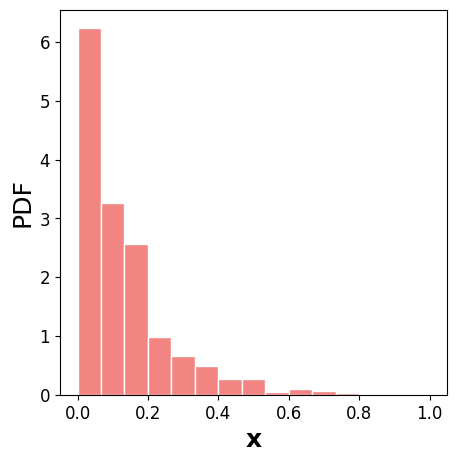

In [3]:
print('Activity potential distribution')

fig, ax = plt.subplots(1,1, figsize = (5, 5))
ax.hist(x, bins = 15, density = True, color = '#f28482', edgecolor = 'white')
ax.tick_params(axis = 'both', labelsize = 12)
ax.set_xlabel(r'$\mathbf{x}$', fontsize = 18)
ax.set_ylabel('PDF', fontsize = 18)
plt.show();

In [7]:
# aggregated graph
df_agg = dfttau.groupby(['i', 'j']).sum().reset_index()[['i', 'j', 'τ']]
W = csr_matrix((df_agg.τ, (df_agg.i, df_agg.j)), shape = (n, n))
W = W + W.T

# strenght vector
s = W@np.ones(n)

# degree vector
d = W.sign()@np.ones(n)

# contact duration
cd = dfttau.τ.values

# interevent distribution
ied = getInterEvent(el)
s_, m = np.std(ied), np.mean(ied)
print(f'Burstiness: {(s_-m)/(s_+m)}')

Burstiness: -0.16079012489228814


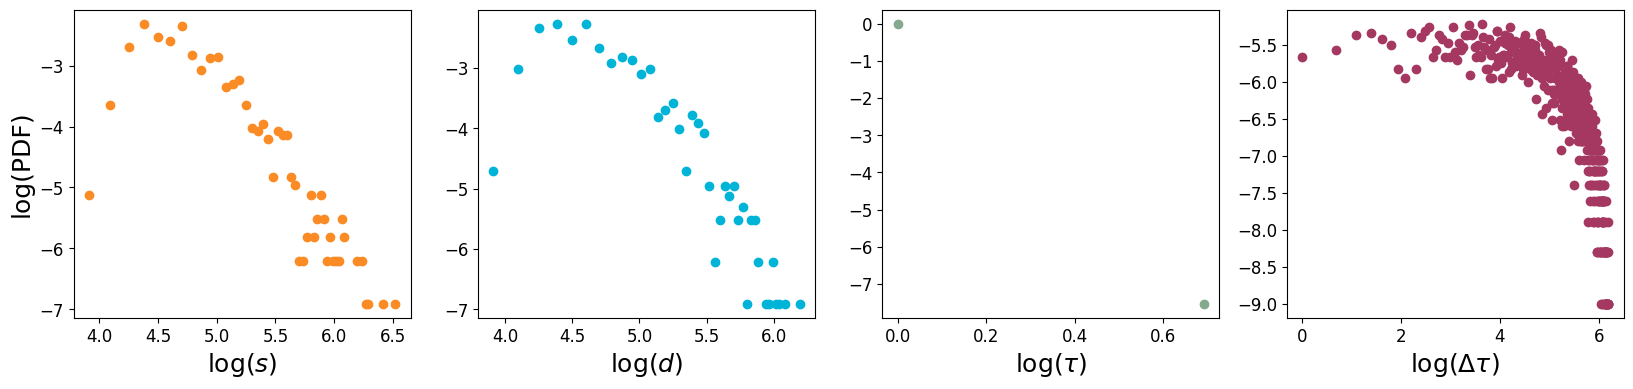

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

# strength distribution
tres = 10
Dc = Counter(tres*(s/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[0].scatter(np.log(x), np.log(y/np.sum(y)), color = '#fb8b24')
ax[0].tick_params(axis = 'both', labelsize = 12)
ax[0].set_xlabel(r'${\rm log}(s)$', fontsize = 18)
ax[0].set_ylabel('log(PDF)', fontsize = 18)



# degree distribution
tres = 10
Dc = Counter(tres*(d/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[1].scatter(np.log(x), np.log(y/np.sum(y)), color = '#00b4d8')
ax[1].tick_params(axis = 'both', labelsize = 12)
ax[1].set_xlabel(r'${\rm log}(d)$', fontsize = 18)


# duration distribution
tres = 1
Dc = Counter(tres*(cd/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[2].scatter(np.log(x), np.log(y/np.sum(y)), color = '#84a98c')
ax[2].tick_params(axis = 'both', labelsize = 12)
ax[2].set_xlabel(r'${\rm log}(\tau)$', fontsize = 18)

# inter-event distribution
tres = 1
Dc = Counter(tres*(ied/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[3].scatter(np.log(x), np.log(y/np.sum(y)), color = '#a53860')
ax[3].tick_params(axis = 'both', labelsize = 12)
ax[3].set_xlabel(r'${\rm log}(\Delta \tau)$', fontsize = 18)
plt.show();

## Attractiveness model

Here we implement the attractiveness driven model and show the degree, strength, event duration and inter-event duration distributions.

In [9]:
n = 500 # number of nodes
L = 1 # box size
step = 0.01 # movement step
r = 0.03 # proximity threshold
T = 500 # number of time steps

# attractivity parameters
a = np.random.negative_binomial(1, 0.1, n).astype(float)
a = a/np.max(a)

rv = np.random.uniform(0,1,n) # activity parameters

# generate the model
dfttau, el = ActractivenessModel(n, L, a, rv, step, r, T, verbose = True)

In [10]:
# aggregated graph
df_agg = dfttau.groupby(['i', 'j']).sum().reset_index()[['i', 'j', 'τ']]
W = csr_matrix((df_agg.τ, (df_agg.i, df_agg.j)), shape = (n, n))
W = W + W.T

# strenght vector
s = W@np.ones(n)

# degree vector
d = W.sign()@np.ones(n)

# contact duration
cd = dfttau.τ.values

# interevent distribution
ied = getInterEvent(el)
s_, m = np.std(ied), np.mean(ied)
print(f'Burstiness: {(s_-m)/(s_+m)}')

Burstiness: 0.4251481036185934


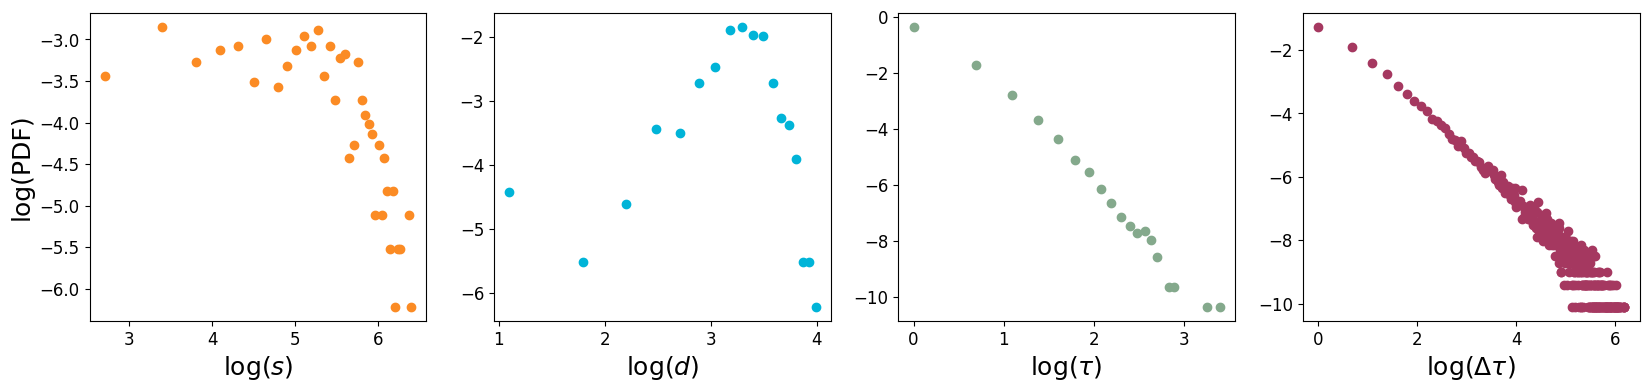

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

# strength distribution
tres = 15
Dc = Counter(tres*(s/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[0].scatter(np.log(x), np.log(y/np.sum(y)), color = '#fb8b24')
ax[0].tick_params(axis = 'both', labelsize = 12)
ax[0].set_xlabel(r'${\rm log}(s)$', fontsize = 18)
ax[0].set_ylabel('log(PDF)', fontsize = 18)



# degree distribution
tres = 3
Dc = Counter(tres*(d/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[1].scatter(np.log(x), np.log(y/np.sum(y)), color = '#00b4d8')
ax[1].tick_params(axis = 'both', labelsize = 12)
ax[1].set_xlabel(r'${\rm log}(d)$', fontsize = 18)


# duration distribution
tres = 1
Dc = Counter(tres*(cd/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[2].scatter(np.log(x), np.log(y/np.sum(y)), color = '#84a98c')
ax[2].tick_params(axis = 'both', labelsize = 12)
ax[2].set_xlabel(r'${\rm log}(\tau)$', fontsize = 18)

# inter-event distribution
tres = 1
Dc = Counter(tres*(ied/tres).astype(int))
x, y = np.array(list(Dc.keys())), np.array(list(Dc.values()))
ax[3].scatter(np.log(x), np.log(y/np.sum(y)), color = '#a53860')
ax[3].tick_params(axis = 'both', labelsize = 12)
ax[3].set_xlabel(r'${\rm log}(\Delta \tau)$', fontsize = 18)
plt.show();